In [1]:
import pandas as pd
filename = r'G:\机器学习\python\胃癌肝转移2.0\data\中国人\chinesetzxzbm.csv'
data = pd.read_csv(filename)
display(data)# dataframe

,Age,Sex,Primary site,Histological type,T Stage,N Stage,Surgery status,Radiation status,Chemotherapy status,Extrahepatic metastasis,Tumor size,liver
0,3,1,7,1,3,3,1,0,1,0,1,0
1,4,1,6,1,3,0,0,0,0,0,2,0
2,0,0,8,2,4,4,0,2,1,0,2,0
3,3,0,3,0,2,3,1,0,1,0,0,0
4,4,1,8,0,4,0,0,2,1,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...
1941,3,1,3,0,2,0,1,2,1,0,0,0
1942,0,1,0,0,2,4,0,2,1,0,1,0
1943,2,1,5,0,0,0,1,2,1,0,0,0
1944,0,0,2,0,4,0,0,2,1,0,2,0


In [2]:
y = data['liver']
display(y)
X = data.drop(columns=['liver'])
display(X)

0       0
1       0
2       0
3       0
4       1
       ..
1941    0
1942    0
1943    0
1944    0
1945    1
Name: liver, Length: 1946, dtype: int64

,Age,Sex,Primary site,Histological type,T Stage,N Stage,Surgery status,Radiation status,Chemotherapy status,Extrahepatic metastasis,Tumor size
0,3,1,7,1,3,3,1,0,1,0,1
1,4,1,6,1,3,0,0,0,0,0,2
2,0,0,8,2,4,4,0,2,1,0,2
3,3,0,3,0,2,3,1,0,1,0,0
4,4,1,8,0,4,0,0,2,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...
1941,3,1,3,0,2,0,1,2,1,0,0
1942,0,1,0,0,2,4,0,2,1,0,1
1943,2,1,5,0,0,0,1,2,1,0,0
1944,0,0,2,0,4,0,0,2,1,0,2


In [3]:
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import TomekLinks
from collections import Counter

# 初始化 SMOTE
smote = SMOTE(sampling_strategy='auto', random_state=2024)

# 首先应用 SMOTE
X_smote, y_smote = smote.fit_resample(X, y)

# 然后应用 TomekLinks
tomek = TomekLinks()
X_resampled, y_resampled = tomek.fit_resample(X_smote, y_smote)

# 查看采样后的数据分布
print('Original dataset shape:', Counter(y))
print('After SMOTE shape:', Counter(y_smote))
print('After TomekLinks shape:', Counter(y_resampled))

Original dataset shape: Counter({0: 1708, 1: 238})
After SMOTE shape: Counter({0: 1708, 1: 1708})
After TomekLinks shape: Counter({0: 1708, 1: 1682})


In [5]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=2024)

In [5]:
from sklearn.model_selection import cross_val_score, StratifiedKFold
cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=2024)

In [6]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression(max_iter=10000, random_state=2024)
                       
lr.fit(X_train, y_train)
lr.score(X_test,y_test)

0.7300884955752213

In [7]:
y_pred = lr.predict(X_test)

In [8]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.77      0.62      0.69       328
           1       0.70      0.83      0.76       350

    accuracy                           0.73       678
   macro avg       0.74      0.73      0.73       678
weighted avg       0.74      0.73      0.73       678



In [9]:
from sklearn.metrics import roc_auc_score
y_proba = lr.predict_proba(X_test)[:,1]#预测的阳性类别概率值
roc_auc_score(y_test, y_proba)

0.803423344947735

In [10]:
from sklearn.metrics import precision_score
precision_score(y_test, y_pred)

0.7021791767554479

In [11]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

0.7300884955752213

In [12]:
from sklearn.metrics import f1_score
f1_score(y_test, y_pred) #average='macro', average='micro' , average='weighted')

0.7601572739187419

In [13]:
from sklearn.model_selection import cross_val_score
metric_cv = cross_val_score(lr,X_test,y_test,scoring='roc_auc',cv=cv)
metric_cv.mean()


0.7976312229437229

In [14]:
from sklearn.model_selection import cross_val_score
metric_cv = cross_val_score(lr,X_test,y_test,scoring='recall',cv=cv)
metric_cv.mean()

0.8285714285714285

In [15]:
from sklearn.model_selection import cross_val_score
metric_cv = cross_val_score(lr,X_test,y_test,scoring='precision',cv=cv)
metric_cv.mean()

0.7045671544162456

In [16]:
from sklearn.model_selection import cross_val_score
metric_cv = cross_val_score(lr,X_test,y_test,scoring='accuracy',cv=cv)
metric_cv.mean()

0.7314310798946444

In [17]:
from sklearn.model_selection import cross_val_score
metric_cv = cross_val_score(lr,X_test,y_test,scoring='f1',cv=cv)
metric_cv.mean()

0.760369716367801

In [19]:
from sklearn.svm import SVC
SVC=SVC(probability=True, random_state=2024)
                       
SVC.fit(X_train, y_train)
SVC.score(X_test,y_test)
y_pred1 = SVC.predict(X_test)
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred1))
from sklearn.model_selection import cross_val_score
metric_cv = cross_val_score(SVC,X_test,y_test,scoring='roc_auc',cv=cv)
metric_cv.mean()
from sklearn.model_selection import cross_val_score
metric_cv = cross_val_score(SVC,X_test,y_test,scoring='recall',cv=cv)
metric_cv.mean()
from sklearn.model_selection import cross_val_score
metric_cv = cross_val_score(SVC,X_test,y_test,scoring='precision',cv=cv)
metric_cv.mean()
from sklearn.model_selection import cross_val_score
metric_cv = cross_val_score(SVC,X_test,y_test,scoring='accuracy',cv=cv)
metric_cv.mean()
from sklearn.model_selection import cross_val_score
metric_cv = cross_val_score(SVC,X_test,y_test,scoring='f1',cv=cv)
metric_cv.mean()

              precision    recall  f1-score   support

           0       0.87      0.65      0.74       328
           1       0.73      0.91      0.81       350

    accuracy                           0.78       678
   macro avg       0.80      0.78      0.78       678
weighted avg       0.80      0.78      0.78       678



0.7900098197959735

In [20]:
from sklearn.svm import SVC
SVC=SVC(probability=True, random_state=2024)
                       
SVC.fit(X_train, y_train)
SVC.score(X_test,y_test)

0.7817109144542773

In [21]:
y_pred1 = SVC.predict(X_test)

In [22]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred1))

              precision    recall  f1-score   support

           0       0.87      0.65      0.74       328
           1       0.73      0.91      0.81       350

    accuracy                           0.78       678
   macro avg       0.80      0.78      0.78       678
weighted avg       0.80      0.78      0.78       678



In [23]:
from sklearn.model_selection import cross_val_score
metric_cv = cross_val_score(SVC,X_test,y_test,scoring='roc_auc',cv=cv)
metric_cv.mean()

0.8272659632034631

In [24]:
from sklearn.model_selection import cross_val_score
metric_cv = cross_val_score(SVC,X_test,y_test,scoring='recall',cv=cv)
metric_cv.mean()

0.8714285714285713

In [25]:
from sklearn.model_selection import cross_val_score
metric_cv = cross_val_score(SVC,X_test,y_test,scoring='precision',cv=cv)
metric_cv.mean()

0.7242523536706476

In [26]:
from sklearn.model_selection import cross_val_score
metric_cv = cross_val_score(SVC,X_test,y_test,scoring='accuracy',cv=cv)
metric_cv.mean()

0.7609306409130816

In [27]:
from sklearn.model_selection import cross_val_score
metric_cv = cross_val_score(SVC,X_test,y_test,scoring='f1',cv=cv)
metric_cv.mean()

0.7900098197959735

In [28]:
from sklearn.ensemble import RandomForestClassifier
RFC=RandomForestClassifier(n_estimators=100,max_depth=10,min_samples_leaf=5,min_samples_split=10, random_state=2024)
RFC.fit(X_train, y_train)
RFC.score(X_test,y_test)

0.8082595870206489

In [29]:
y_pred2 = RFC.predict(X_test)

In [30]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred2))

              precision    recall  f1-score   support

           0       0.85      0.73      0.79       328
           1       0.78      0.88      0.83       350

    accuracy                           0.81       678
   macro avg       0.81      0.81      0.81       678
weighted avg       0.81      0.81      0.81       678



In [31]:
from sklearn.model_selection import cross_val_score, StratifiedKFold
cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=2024)
metric_cv = cross_val_score(RFC, X_test, y_test, scoring='roc_auc', cv=cv)
print("Average AUC Score:", metric_cv.mean())

Average AUC Score: 0.8620549242424242


In [32]:
from sklearn.model_selection import cross_val_score
metric_cv = cross_val_score(RFC,X_test,y_test,scoring='roc_auc',cv=cv)
metric_cv.mean()

0.8620549242424242

In [33]:
from sklearn.model_selection import cross_val_score
metric_cv = cross_val_score(RFC,X_test,y_test,scoring='recall',cv=cv)
metric_cv.mean()

0.8685714285714287

In [34]:
from sklearn.model_selection import cross_val_score
metric_cv = cross_val_score(RFC,X_test,y_test,scoring='precision',cv=cv)
metric_cv.mean()

0.7557807480946119

In [35]:
from sklearn.model_selection import cross_val_score
metric_cv = cross_val_score(RFC,X_test,y_test,scoring='accuracy',cv=cv)
metric_cv.mean()

0.7860184372256365

In [36]:
from sklearn.model_selection import cross_val_score
metric_cv = cross_val_score(RFC,X_test,y_test,scoring='f1',cv=cv)
metric_cv.mean()

0.8075500604462164

In [37]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
knn.score(X_test,y_test)

0.8451327433628318

In [38]:
y_pred3 = knn.predict(X_test)

In [39]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred3))

              precision    recall  f1-score   support

           0       0.96      0.71      0.82       328
           1       0.78      0.97      0.87       350

    accuracy                           0.85       678
   macro avg       0.87      0.84      0.84       678
weighted avg       0.87      0.85      0.84       678



In [40]:
from sklearn.model_selection import cross_val_score
metric_cv = cross_val_score(knn,X_test,y_test,scoring='roc_auc',cv=cv)
metric_cv.mean()

0.818931277056277

In [41]:
from sklearn.model_selection import cross_val_score
metric_cv = cross_val_score(knn,X_test,y_test,scoring='recall',cv=cv)
metric_cv.mean()

0.8714285714285713

In [42]:
from sklearn.model_selection import cross_val_score
metric_cv = cross_val_score(knn,X_test,y_test,scoring='precision',cv=cv)
metric_cv.mean()

0.7056645075476613

In [43]:
from sklearn.model_selection import cross_val_score
metric_cv = cross_val_score(knn,X_test,y_test,scoring='accuracy',cv=cv)
metric_cv.mean()

0.7432616330114135

In [44]:
from sklearn.model_selection import cross_val_score
metric_cv = cross_val_score(knn,X_test,y_test,scoring='f1',cv=cv)
metric_cv.mean()

0.7784752282598426

In [45]:
from xgboost import XGBClassifier
XGB=XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=2024)
XGB.fit(X_train, y_train)
XGB.score(X_test,y_test)

0.8805309734513275

In [46]:
y_pred5 = XGB.predict(X_test)

In [47]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred5))

              precision    recall  f1-score   support

           0       0.91      0.84      0.87       328
           1       0.86      0.92      0.89       350

    accuracy                           0.88       678
   macro avg       0.88      0.88      0.88       678
weighted avg       0.88      0.88      0.88       678



In [48]:
from sklearn.model_selection import cross_val_score
metric_cv = cross_val_score(XGB,X_test,y_test,scoring='roc_auc',cv=cv)
metric_cv.mean()

0.8739813311688313

In [49]:
from sklearn.model_selection import cross_val_score
metric_cv = cross_val_score(XGB,X_test,y_test,scoring='recall',cv=cv)
metric_cv.mean()

0.86

In [50]:
from sklearn.model_selection import cross_val_score
metric_cv = cross_val_score(XGB,X_test,y_test,scoring='precision',cv=cv)
metric_cv.mean()

0.8063141464693052

In [51]:
from sklearn.model_selection import cross_val_score
metric_cv = cross_val_score(XGB,X_test,y_test,scoring='accuracy',cv=cv)
metric_cv.mean()

0.8184372256365233

In [52]:
from sklearn.model_selection import cross_val_score
metric_cv = cross_val_score(XGB,X_test,y_test,scoring='f1',cv=cv)
metric_cv.mean()

0.8312071610444216

In [53]:
from sklearn.neural_network import MLPClassifier
MLP = MLPClassifier(alpha=0.1, max_iter=1000, random_state=2024)
MLP.fit(X_train, y_train)
MLP.score(X_test,y_test)

0.8407079646017699

In [54]:
y_pred6 = MLP.predict(X_test)

In [55]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred6))

              precision    recall  f1-score   support

           0       0.87      0.78      0.83       328
           1       0.82      0.89      0.85       350

    accuracy                           0.84       678
   macro avg       0.84      0.84      0.84       678
weighted avg       0.84      0.84      0.84       678



In [56]:
from sklearn.model_selection import cross_val_score
metric_cv = cross_val_score(MLP,X_test,y_test,scoring='roc_auc',cv=cv)
metric_cv.mean()

0.8405370670995671

In [57]:
from sklearn.model_selection import cross_val_score
metric_cv = cross_val_score(MLP,X_test,y_test,scoring='recall',cv=cv)
metric_cv.mean()

0.8257142857142858

In [58]:
from sklearn.model_selection import cross_val_score
metric_cv = cross_val_score(MLP,X_test,y_test,scoring='precision',cv=cv)
metric_cv.mean()

0.7649216291908185

In [59]:
from sklearn.model_selection import cross_val_score
metric_cv = cross_val_score(MLP,X_test,y_test,scoring='accuracy',cv=cv)
metric_cv.mean()

0.7756584723441615

In [60]:
from sklearn.model_selection import cross_val_score
metric_cv = cross_val_score(MLP,X_test,y_test,scoring='f1',cv=cv)
metric_cv.mean()

0.7910338796044308

In [61]:
import numpy as np
import matplotlib.pyplot as plt

In [6]:
from sklearn.ensemble import StackingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.naive_bayes import CategoricalNB
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from sklearn.metrics import classification_report

# 定义基学习器
base_learners = [
    ('lr', LogisticRegression(max_iter=10000, random_state=2024)),
    ('svc', SVC(probability=True, random_state=2024)),
    ('rfc', RandomForestClassifier(n_estimators=100, max_depth=10, min_samples_leaf=5, min_samples_split=10, random_state=2024)),
    ('knn', KNeighborsClassifier(n_neighbors=5)),
    ('mlp', MLPClassifier(alpha=0.1, max_iter=1000, random_state=2024)),
    ('xgb', XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=2024))
]

# 定义元学习器（Logistic Regression 或其他分类器）
meta_learner = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=2024)

# 使用堆叠法进行集成
stacking_clf = StackingClassifier(estimators=base_learners, final_estimator=meta_learner)

# 训练堆叠模型
stacking_clf.fit(X_train, y_train)

# 测试集预测
y_pred = stacking_clf.predict(X_test)

# 打印评估指标
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.89      0.88      0.88       328
           1       0.88      0.90      0.89       350

    accuracy                           0.89       678
   macro avg       0.89      0.89      0.89       678
weighted avg       0.89      0.89      0.89       678



In [7]:
import joblib

# 保存模型到文件
with open('stacking_clf.joblib', 'wb') as f:
    joblib.dump(stacking_clf, f)

In [9]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score
import joblib

# 1. 加载外部验证集
#validation_data = pd.read_csv('G:\机器学习\python\胃癌肝转移2.0\data\中国人\validation_data.csv')
filename = r'G:\机器学习\python\胃癌肝转移2.0\data\中国人\validation_data.csv'
data = pd.read_csv(filename)

# 2. 分离特征和标签
y = data['liver']
display(y)
X = data.drop(columns=['liver'])
display(X)



# 4. 加载已经训练好的模型
model = joblib.load('stacking_clf.joblib')

# 5. 使用模型进行预测
y_pred = model.predict(X)
y_pred_proba = model.predict_proba(X)[:, 1]  # 如果需要概率值

# 6. 计算验证集上的性能指标
accuracy = accuracy_score(y, y_pred)
f1 = f1_score(y, y_pred)
roc_auc = roc_auc_score(y, y_pred_proba)

print(f'Accuracy: {accuracy}')
print(f'F1 Score: {f1}')
print(f'ROC AUC: {roc_auc}')

0    1
1    0
2    0
3    1
4    0
5    0
6    1
7    0
8    0
9    0
Name: liver, dtype: int64

,Age,Sex,Primary site,Histological type,T Stage,N Stage,Surgery status,Radiation status,Chemotherapy status,Extrahepatic metastasis,Tumor size
0,3,1,3,0,3,2,0,1,1,0,1
1,1,1,5,0,0,0,1,1,0,0,0
2,2,1,6,0,0,1,1,1,1,0,3
3,1,1,5,0,2,2,0,1,1,0,0
4,2,1,6,0,3,2,1,1,0,0,0
5,3,1,6,0,3,2,1,1,1,0,0
6,2,0,5,0,3,3,1,1,1,0,0
7,1,1,7,0,3,2,1,1,1,0,0
8,3,1,0,0,2,3,1,1,1,0,1
9,2,1,5,0,0,0,1,1,0,0,0


Accuracy: 0.9
F1 Score: 0.8
ROC AUC: 0.8095238095238095


Predicted labels (y_pred):
[1 0 0 1 0 0 0 0 0 0]
Predicted probabilities (y_pred_proba):
[9.7167712e-01 3.8832647e-04 2.4955638e-04 5.6760627e-01 1.1040877e-02
 2.4514922e-04 2.8436282e-04 1.6945222e-02 1.3265632e-04 3.1234682e-04]
Accuracy: 0.9
F1 Score: 0.8
ROC AUC: 0.8095238095238095
Recall: 0.6666666666666666


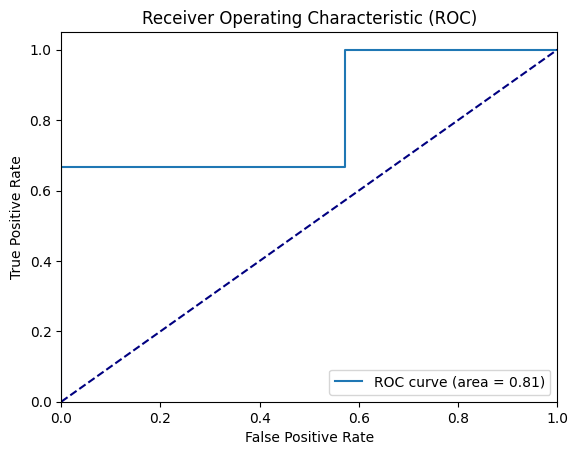

In [10]:
from sklearn.metrics import recall_score

import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve

# 5. 使用模型进行预测
y_pred = model.predict(X)
y_pred_proba = model.predict_proba(X)[:, 1]  # 如果需要概率值

# 输出预测值和概率值
print("Predicted labels (y_pred):")
print(y_pred)

print("Predicted probabilities (y_pred_proba):")
print(y_pred_proba)

# 6. 计算验证集上的性能指标
accuracy = accuracy_score(y, y_pred)
f1 = f1_score(y, y_pred)
roc_auc = roc_auc_score(y, y_pred_proba)
recall = recall_score(y, y_pred)


print(f'Accuracy: {accuracy}')
print(f'F1 Score: {f1}')
print(f'ROC AUC: {roc_auc}')
print(f'Recall: {recall}')

# 7. 计算并绘制ROC曲线
fpr, tpr, thresholds = roc_curve(y, y_pred_proba)

# 绘制ROC曲线
plt.figure()
plt.plot(fpr, tpr, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')  # 画一条对角线
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc='lower right')
plt.show()